In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [53]:
dataFrame = pd.read_csv("electric_price.csv")

In [54]:
dataFrame.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive
0,1/1/2015,99635.030,25.633696,97319.240,26.415953
1,1/2/2015,129606.010,33.138988,121082.015,38.837661
2,1/3/2015,142300.540,34.564855,142300.540,34.564855
3,1/4/2015,104330.715,25.005560,104330.715,25.005560
4,1/5/2015,118132.200,26.724176,118132.200,26.724176


In [55]:
dataFrame.describe()

,demand,RRP,demand_pos_RRP,RRP_positive
count,2106.000000,2106.000000,2106.000000,2106.000000
mean,120035.476503,76.079554,119252.305055,76.553847
std,13747.993761,130.246805,14818.631319,130.114184
min,85094.375000,-6.076028,41988.240000,13.568986
25%,109963.650000,38.707040,109246.250000,39.117361
50%,119585.912500,66.596738,119148.082500,66.869058
75%,130436.006250,95.075012,130119.477500,95.130181
max,170653.840000,4549.645105,170653.840000,4549.645105


In [56]:
dataFrame.isnull()

,date,demand,RRP,demand_pos_RRP,RRP_positive
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2101,False,False,False,False,False
2102,False,False,False,False,False
2103,False,False,False,False,False
2104,False,False,False,False,False


In [57]:
dataFrame.isnull().sum()

date              0
demand            0
RRP               0
demand_pos_RRP    0
RRP_positive      0
dtype: int64

C:\Users\canim\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RRP_positive', ylabel='Density'>

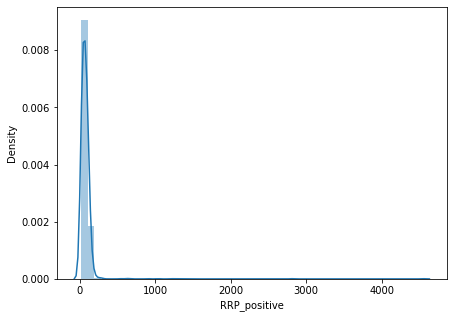

In [58]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["RRP_positive"])

In [59]:
dataFrame.corr()

,demand,RRP,demand_pos_RRP,RRP_positive
demand,1.000000,0.217538,0.971377,0.215038
RRP,0.217538,1.000000,0.220856,0.999821
demand_pos_RRP,0.971377,0.220856,1.000000,0.214628
RRP_positive,0.215038,0.999821,0.214628,1.000000


In [60]:
dataFrame.corr()["RRP_positive"].sort_values()

demand_pos_RRP    0.214628
demand            0.215038
RRP               0.999821
RRP_positive      1.000000
Name: RRP_positive, dtype: float64

<AxesSubplot:xlabel='demand_pos_RRP', ylabel='RRP_positive'>

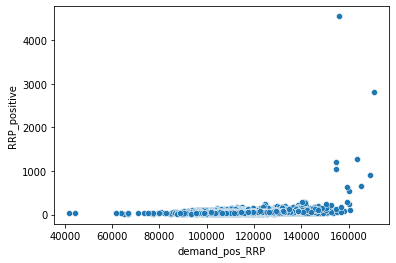

In [61]:
sbn.scatterplot(x="demand_pos_RRP",y="RRP_positive",data=dataFrame)

In [62]:
dataFrame.sort_values("RRP_positive",ascending = False).head(20)

,date,demand,RRP,demand_pos_RRP,RRP_positive
1484,1/24/2019,155891.345,4549.645105,155891.345,4549.645105
1856,1/31/2020,170653.840,2809.437516,170653.840,2809.437516
1520,3/1/2019,163682.040,1284.799876,163682.040,1284.799876
1113,1/18/2018,154648.065,1210.137920,154648.065,1210.137920
1855,1/30/2020,154816.490,1044.447303,154816.490,1044.447303
1485,1/25/2019,168894.845,906.437232,168894.845,906.437232
1114,1/19/2018,165070.595,647.574163,165070.595,647.574163
1133,2/7/2018,159307.315,624.260934,159307.315,624.260934
377,1/13/2016,160011.075,545.737820,160011.075,545.737820
1824,12/30/2019,140410.125,295.829202,140410.125,295.829202


In [63]:
dataFrame.sort_values("RRP_positive",ascending = True).head(20)

,date,demand,RRP,demand_pos_RRP,RRP_positive
457,4/2/2016,102832.720,13.568986,102832.720,13.568986
306,11/3/2015,101793.035,14.157948,101793.035,14.157948
668,10/30/2016,94325.720,6.869135,65215.145,14.167928
73,3/15/2015,100170.295,14.373099,100170.295,14.373099
653,10/15/2016,97887.485,12.698329,88673.470,14.460175
1858,2/2/2020,97609.060,14.235635,95445.915,14.558266
31,2/1/2015,100178.840,14.578844,100178.840,14.578844
304,11/1/2015,103629.645,14.684840,103629.645,14.684840
682,11/13/2016,96805.925,10.725642,85044.935,14.807393
359,12/26/2015,95093.295,14.967108,95093.295,14.967108


In [64]:
len(dataFrame)

2106

In [65]:
len(dataFrame)*0.01

21.06

In [66]:
newDf = dataFrame.sort_values("RRP_positive",ascending = False).iloc[21:]

In [67]:
newDf.describe()

,demand,RRP,demand_pos_RRP,RRP_positive
count,2085.000000,2085.000000,2085.000000,2085.000000
mean,119729.478638,68.927915,118938.419132,69.406985
std,13405.043565,35.026925,14494.733098,34.624581
min,85094.375000,-6.076028,41988.240000,13.568986
25%,109857.485000,38.485259,109147.650000,38.972005
50%,119331.850000,65.914965,118994.655000,66.411603
75%,130044.375000,93.834089,129749.140000,94.000719
max,160437.565000,188.197650,160437.565000,188.197650


C:\Users\canim\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RRP_positive', ylabel='Density'>

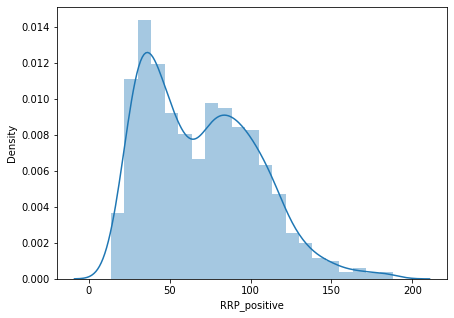

In [68]:
plt.figure(figsize=(7,5))
sbn.distplot(newDf["RRP_positive"])

In [69]:
dataFrame.groupby("demand_pos_RRP").mean()["RRP_positive"]

demand_pos_RRP
41988.240       26.980251
44133.510       32.438156
61517.580       25.582436
63861.950       31.168805
65215.145       14.167928
                 ...     
160437.565     107.657425
163682.040    1284.799876
165070.595     647.574163
168894.845     906.437232
170653.840    2809.437516
Name: RRP_positive, Length: 2105, dtype: float64

In [70]:
newDf.groupby("demand_pos_RRP").mean()["RRP_positive"]

demand_pos_RRP
41988.240      26.980251
44133.510      32.438156
61517.580      25.582436
63861.950      31.168805
65215.145      14.167928
                 ...    
154924.890     69.328821
156648.405    177.861817
156924.830     66.960656
158052.890     81.192486
160437.565    107.657425
Name: RRP_positive, Length: 2084, dtype: float64

In [71]:
dataFrame = newDf

In [72]:
dataFrame.describe()

,demand,RRP,demand_pos_RRP,RRP_positive
count,2085.000000,2085.000000,2085.000000,2085.000000
mean,119729.478638,68.927915,118938.419132,69.406985
std,13405.043565,35.026925,14494.733098,34.624581
min,85094.375000,-6.076028,41988.240000,13.568986
25%,109857.485000,38.485259,109147.650000,38.972005
50%,119331.850000,65.914965,118994.655000,66.411603
75%,130044.375000,93.834089,129749.140000,94.000719
max,160437.565000,188.197650,160437.565000,188.197650


In [73]:
dataFrame.groupby("demand_pos_RRP").mean()["RRP_positive"]

demand_pos_RRP
41988.240      26.980251
44133.510      32.438156
61517.580      25.582436
63861.950      31.168805
65215.145      14.167928
                 ...    
154924.890     69.328821
156648.405    177.861817
156924.830     66.960656
158052.890     81.192486
160437.565    107.657425
Name: RRP_positive, Length: 2084, dtype: float64

In [74]:
dataFrame = dataFrame.drop("date",axis=1)

In [75]:
dataFrame.head()

,demand,RRP,demand_pos_RRP,RRP_positive
1474,147070.535,188.197650,147070.535,188.197650
350,152366.300,188.086125,152366.300,188.086125
1494,133287.585,186.917632,133287.585,186.917632
1702,131871.080,185.205284,131871.080,185.205284
809,131980.985,184.823479,131980.985,184.823479


In [76]:
y = dataFrame["RRP_positive"].values
x = dataFrame.drop("RRP_positive",axis=1).values

In [77]:
y

array([188.1976495 , 188.0861252 , 186.9176322 , ...,  14.16792844,
        14.15794771,  13.56898646])

In [78]:
x

array([[1.47070535e+05, 1.88197650e+02, 1.47070535e+05],
       [1.52366300e+05, 1.88086125e+02, 1.52366300e+05],
       [1.33287585e+05, 1.86917632e+02, 1.33287585e+05],
       ...,
       [9.43257200e+04, 6.86913450e+00, 6.52151450e+04],
       [1.01793035e+05, 1.41579477e+01, 1.01793035e+05],
       [1.02832720e+05, 1.35689865e+01, 1.02832720e+05]])

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [81]:
len(x_train)

1459

In [82]:
len(x_test)

626

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()

In [85]:
x_train = scaler.fit_transform(x_train)

In [86]:
x_test = scaler.transform(x_test)

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [88]:
x_train.shape

(1459, 3)

In [89]:
model = Sequential()

model.add(Dense(4,activation="relu")) 
model.add(Dense(4,activation="relu")) 
model.add(Dense(4,activation="relu")) 
model.add(Dense(4,activation="relu")) 

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [90]:
model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), batch_size = 25, epochs = 400)

Epoch 1/400
59/59 [==============================] - 1s 6ms/step - loss: 5840.9556 - val_loss: 6028.8945
Epoch 2/400
59/59 [==============================] - 0s 3ms/step - loss: 5600.7769 - val_loss: 5657.9814
Epoch 3/400
59/59 [==============================] - 0s 3ms/step - loss: 5043.6831 - val_loss: 4821.3384
Epoch 4/400
59/59 [==============================] - 0s 3ms/step - loss: 3944.2698 - val_loss: 3357.0303
Epoch 5/400
59/59 [==============================] - 0s 3ms/step - loss: 2385.1619 - val_loss: 1729.2224
Epoch 6/400
59/59 [==============================] - 0s 3ms/step - loss: 1248.1605 - val_loss: 1059.9828
Epoch 7/400
59/59 [==============================] - 0s 3ms/step - loss: 993.5993 - val_loss: 975.8998
Epoch 8/400
59/59 [==============================] - 0s 2ms/step - loss: 946.4590 - val_loss: 928.0303
Epoch 9/400
59/59 [==============================] - 0s 2ms/step - loss: 898.3627 - val_loss: 877.0756
Epoch 10/400
59/59 [==============================] - 0s 3ms/

59/59 [==============================] - 0s 2ms/step - loss: 2.8721 - val_loss: 4.3087
Epoch 83/400
59/59 [==============================] - 0s 3ms/step - loss: 2.8187 - val_loss: 4.2612
Epoch 84/400
59/59 [==============================] - 0s 2ms/step - loss: 2.7867 - val_loss: 4.2117
Epoch 85/400
59/59 [==============================] - 0s 2ms/step - loss: 2.7413 - val_loss: 4.1776
Epoch 86/400
59/59 [==============================] - 0s 3ms/step - loss: 2.7050 - val_loss: 4.1283
Epoch 87/400
59/59 [==============================] - 0s 3ms/step - loss: 2.6711 - val_loss: 4.0841
Epoch 88/400
59/59 [==============================] - 0s 2ms/step - loss: 2.6550 - val_loss: 4.0465
Epoch 89/400
59/59 [==============================] - 0s 2ms/step - loss: 2.6052 - val_loss: 4.0013
Epoch 90/400
59/59 [==============================] - 0s 2ms/step - loss: 2.5540 - val_loss: 4.0290
Epoch 91/400
59/59 [==============================] - 0s 3ms/step - loss: 2.5305 - val_loss: 3.8701
Epoch 92/400


59/59 [==============================] - 0s 3ms/step - loss: 1.5923 - val_loss: 2.4308
Epoch 164/400
59/59 [==============================] - 0s 3ms/step - loss: 1.5996 - val_loss: 2.5825
Epoch 165/400
59/59 [==============================] - 0s 4ms/step - loss: 1.6245 - val_loss: 2.4057
Epoch 166/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5795 - val_loss: 2.1706
Epoch 167/400
59/59 [==============================] - 0s 4ms/step - loss: 1.6110 - val_loss: 2.2830
Epoch 168/400
59/59 [==============================] - 0s 3ms/step - loss: 1.5974 - val_loss: 2.1088
Epoch 169/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5500 - val_loss: 2.1127
Epoch 170/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5541 - val_loss: 2.1011
Epoch 171/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5478 - val_loss: 2.0965
Epoch 172/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5624 - val_loss: 2.1407
Epoc

59/59 [==============================] - 0s 4ms/step - loss: 1.5592 - val_loss: 2.0497
Epoch 245/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5439 - val_loss: 2.0518
Epoch 246/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5668 - val_loss: 2.1018
Epoch 247/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5803 - val_loss: 2.0652
Epoch 248/400
59/59 [==============================] - 0s 3ms/step - loss: 1.5496 - val_loss: 2.0534
Epoch 249/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5492 - val_loss: 2.0401
Epoch 250/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5463 - val_loss: 2.0355
Epoch 251/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5949 - val_loss: 2.0356
Epoch 252/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5576 - val_loss: 2.0859
Epoch 253/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5816 - val_loss: 2.0437
Epoc

59/59 [==============================] - 0s 4ms/step - loss: 1.5355 - val_loss: 2.1276
Epoch 326/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5902 - val_loss: 2.0805
Epoch 327/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5667 - val_loss: 2.0643
Epoch 328/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5449 - val_loss: 2.0280
Epoch 329/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5408 - val_loss: 2.1343
Epoch 330/400
59/59 [==============================] - 0s 3ms/step - loss: 1.6139 - val_loss: 2.0610
Epoch 331/400
59/59 [==============================] - 0s 3ms/step - loss: 1.5485 - val_loss: 2.2475
Epoch 332/400
59/59 [==============================] - 0s 4ms/step - loss: 1.5909 - val_loss: 2.1063
Epoch 333/400
59/59 [==============================] - 0s 3ms/step - loss: 1.5393 - val_loss: 2.0257
Epoch 334/400
59/59 [==============================] - 0s 3ms/step - loss: 1.5600 - val_loss: 2.0363
Epoc

In [91]:
lostData = pd.DataFrame(model.history.history)

In [92]:
lostData.head()

,loss,val_loss
0,5840.955566,6028.894531
1,5600.776855,5657.981445
2,5043.683105,4821.338379
3,3944.269775,3357.030273
4,2385.161865,1729.222412


<AxesSubplot:>

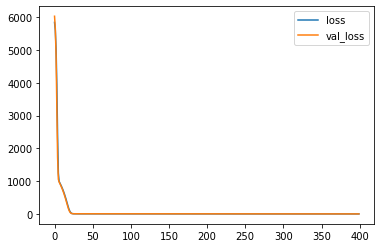

In [93]:
lostData.plot()

In [94]:
tahminDizi = model.predict(x_test)

In [95]:
tahminDizi

array([[ 42.742798],
       [ 26.792477],
       [ 23.129198],
       [ 64.309166],
       [ 30.519487],
       [ 28.566845],
       [ 86.61803 ],
       [ 48.17011 ],
       [ 37.449593],
       [ 85.68472 ],
       [116.26124 ],
       [ 89.252754],
       [ 99.99747 ],
       [ 52.401287],
       [ 80.86804 ],
       [123.81717 ],
       [ 77.62401 ],
       [ 71.0593  ],
       [103.144455],
       [ 43.35632 ],
       [106.895874],
       [ 26.923307],
       [ 88.95522 ],
       [ 43.613026],
       [ 35.38048 ],
       [ 24.494947],
       [ 19.420578],
       [ 67.79648 ],
       [ 92.31568 ],
       [ 81.974976],
       [ 92.14303 ],
       [ 37.856976],
       [ 55.66612 ],
       [ 31.230944],
       [ 39.04746 ],
       [ 31.874464],
       [ 97.555824],
       [ 33.689213],
       [ 68.69812 ],
       [ 37.70744 ],
       [ 36.82577 ],
       [ 33.495346],
       [ 97.90568 ],
       [ 61.20429 ],
       [ 33.989643],
       [ 43.769474],
       [ 82.733315],
       [ 68.3

In [96]:
mean_absolute_error(y_test,tahminDizi) 

0.26274638449044024

In [97]:
dataFrame.describe()

,demand,RRP,demand_pos_RRP,RRP_positive
count,2085.000000,2085.000000,2085.000000,2085.000000
mean,119729.478638,68.927915,118938.419132,69.406985
std,13405.043565,35.026925,14494.733098,34.624581
min,85094.375000,-6.076028,41988.240000,13.568986
25%,109857.485000,38.485259,109147.650000,38.972005
50%,119331.850000,65.914965,118994.655000,66.411603
75%,130044.375000,93.834089,129749.140000,94.000719
max,160437.565000,188.197650,160437.565000,188.197650


In [98]:
dataFrame.iloc[2]

demand            133287.585000
RRP                  186.917632
demand_pos_RRP    133287.585000
RRP_positive         186.917632
Name: 1494, dtype: float64

In [99]:
dataFrame

,demand,RRP,demand_pos_RRP,RRP_positive
1474,147070.535,188.197650,147070.535,188.197650
350,152366.300,188.086125,152366.300,188.086125
1494,133287.585,186.917632,133287.585,186.917632
1702,131871.080,185.205284,131871.080,185.205284
809,131980.985,184.823479,131980.985,184.823479
...,...,...,...,...
653,97887.485,12.698329,88673.470,14.460175
73,100170.295,14.373099,100170.295,14.373099
668,94325.720,6.869135,65215.145,14.167928
306,101793.035,14.157948,101793.035,14.157948


In [100]:
newPredict = dataFrame.drop("RRP_positive", axis=1).iloc[2]

In [102]:
newPredict = scaler.transform(newPredict.values.reshape(-1,3))

In [103]:
model.predict(newPredict)

array([[186.90439]], dtype=float32)